Урок 4. Непрерывные случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. Центральная предельная теорема

ДЗ_4
Задача 3

Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:
1. Выберите несколько значений n (например, 2, 5, 10, 50).
2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения, D - его дисперсия).

При достаточно большом n гистограмма должна соответствовать построенной функции плотности.
Проверим утверждение центральной предельной теоремы на равномерном распределении  𝑋  с параметрами  𝑎=−2 ,  𝑏=10 .
Используем функцию pdf_normal

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [26]:
a = -2
b = 10

m = (a + b) / 2
d = ((b - a) ** 2) / 12

n_samples = 1000

In [27]:
def get_mean_samples_uniform(n):
    samples = np.random.uniform(a, b, size=(n, n_samples))
    
    return samples.mean(axis=0)

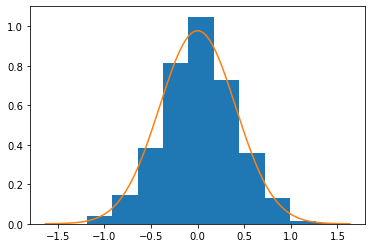

In [31]:
def pdf_normal(loc, scale, x):
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

n = 50

loc = m
scale = np.sqrt(d / n)
samples = get_mean_samples_uniform(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=10)
plt.plot(ox, oy)

 Задача 1

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

Пусть X - нормально распределенная случайная величина, равная массе
коробки с конфетами, параметры mu =1,06 (математическое ожидание), s (среднее
квадратичное отклонение)

In [32]:
mu = 1.06
st = 0
end = 1
p = 0.05
er = 0.0001

print('Cdf\tScale')

while True:
    scale = (st + end) / 2
    cdf = stats.norm.cdf(1, loc = mu, scale = scale)
    print(round(cdf, 4), '\t', round(scale, 4))
    if cdf <= p - er:
        st = scale
    elif cdf >= p + er:
        end = scale
    else:
        break
print('Среднее квадратичное отклонение = ', scale)

Cdf	Scale
0.4522 	 0.5
0.4052 	 0.25
0.3156 	 0.125
0.1685 	 0.0625
0.0274 	 0.0312
0.1003 	 0.0469
0.0623 	 0.0391
0.0439 	 0.0352
0.053 	 0.0371
0.0484 	 0.0361
0.0507 	 0.0366
0.0495 	 0.0364
0.0501 	 0.0365
0.0498 	 0.0364
0.05 	 0.0365
Среднее квадратичное отклонение =  0.036468505859375


In [33]:
stats.norm.cdf(1, loc = mu, scale = scale)

0.049958594078015874

In [35]:
1 - stats.norm.cdf(1.1, loc = mu, scale = scale)

0.1363563656878326

Задача 2

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

Подсказка. Для равномерного распределения в промежутке [a, b]:
1. мат. ожидание равно (a + b) / 2,
2. дисперсия равна (b - a)^2 / 12.

In [41]:
a = 12
b = 14
n = 30

m = (a + b) / 2
d = (b - a)**2 / 12

mu = n * m
sigma = np.sqrt(n * d)
print(sigma)

3.1622776601683795


Определим вероятность того, что масса все коробки будет меньше 390 гр.

In [44]:
stats.norm.cdf(390, loc = mu, scale = sigma)


0.5

Определим вероятность того, что масса все коробки будет больше 390 гр.

In [45]:
1 - stats.norm.cdf(395, loc = mu, scale = sigma)

0.5

Определим вероятность того, что масса все коробки будет больше от 380 гр. до 400 гр.

In [46]:
stats.norm.cdf(400, loc = mu, scale = sigma) - stats.norm.cdf(380, loc = mu, scale = sigma)

0.9984345977419975